## Customer Churn Analysis

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Telecom_Customer_Churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From the above analysis it is known that
1. The data set has total 21 variables, out of which 20 are feature variables and one target variable(Churn).
2. Total number of rows present in teh data set are 7043.
3. Most of the variables are of string type(object). Only three variables are in numeric form.

In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are No Null values present in the data set. 

In [5]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


From the above analysis it is seen that:
1. The string variables present in the data set have mostly 'yes' or 'no' values. These values need to be converted to numerical type.
2. The customerID column can be dropped.
3. The values given in the Total Charges column are of float types but given as object that needs to be converted from object to float.

#### Finding out the unique values in the categorical data columns.

In [6]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
print('Gender:',df.gender.nunique())
print('Gender Values:',df.gender.unique())
print('Partner:',df.Partner.nunique())
print('Partner Values:',df.Partner.unique())
print('Dependents:',df.Dependents.nunique())
print('Dependents Values:',df.Dependents.unique())
print('PhoneSevice:',df.PhoneService.nunique())
print('PhoneService Values:',df.PhoneService.unique())
print('MultipleLines:',df.MultipleLines.nunique())
print('MultipleLines Values:',df.MultipleLines.unique())
print('InternetService:',df.InternetService.nunique())
print('InternetService Values:',df.InternetService.unique())
print('OnlineSecurity:',df.OnlineSecurity.nunique())
print('OnlineSecurity Values:',df.OnlineSecurity.unique())
print('OnlineBackup:',df.OnlineBackup.nunique())
print('OnlineBackup Values:',df.OnlineBackup.unique())
print('DeviceProtection:',df.DeviceProtection.nunique())
print('DeviceProtection:',df.DeviceProtection.unique())
print('TechSupport:',df.TechSupport.nunique())
print('TechSupport Values:',df.TechSupport.unique())
print('StreamingTV:',df.StreamingTV.nunique())
print('StreamingTV Values:',df.StreamingTV.unique())
print('StreamingMovies:',df.StreamingMovies.nunique())
print('StreamingMovies Values:',df.StreamingMovies.unique())
print('Contract:',df.Contract.nunique())
print('Contract Values:',df.Contract.unique())
print('PaperlessBilling:',df.PaperlessBilling.nunique())
print('PaperlessBilling Values:',df.PaperlessBilling.unique())
print('PaymentMethod:',df.PaymentMethod.nunique())
print('PaymentMethod Values:',df.PaymentMethod.unique())
print('MonthlyCharges:',df.MonthlyCharges.nunique())
print('MonthlyCharges Values:',df.MonthlyCharges.unique())
print('TotalCharges:',df.TotalCharges.nunique())
print('TotalCharges Values:',df.TotalCharges.unique())
print('Churn:',df.Churn.nunique())
print('Churn Values:',df.Churn.unique())

Gender: 2
Gender Values: ['Female' 'Male']
Partner: 2
Partner Values: ['Yes' 'No']
Dependents: 2
Dependents Values: ['No' 'Yes']
PhoneSevice: 2
PhoneService Values: ['No' 'Yes']
MultipleLines: 3
MultipleLines Values: ['No phone service' 'No' 'Yes']
InternetService: 3
InternetService Values: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: 3
OnlineSecurity Values: ['No' 'Yes' 'No internet service']
OnlineBackup: 3
OnlineBackup Values: ['Yes' 'No' 'No internet service']
DeviceProtection: 3
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: 3
TechSupport Values: ['No' 'Yes' 'No internet service']
StreamingTV: 3
StreamingTV Values: ['No' 'Yes' 'No internet service']
StreamingMovies: 3
StreamingMovies Values: ['No' 'Yes' 'No internet service']
Contract: 3
Contract Values: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: 2
PaperlessBilling Values: ['Yes' 'No']
PaymentMethod: 4
PaymentMethod Values: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit car

From the above analysis it is seen that all the values present are unique, means there is no duplication with different spellings

In [8]:
# changing the total charges column from object type to float type.
#df.TotalCharges=df.TotalCharges.astype('int64')
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [9]:
# Dropping 'customerID' column
df.drop(labels=['customerID'],axis=1,inplace=True)

In [10]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


#### Plotting Countplots for Categorical Data

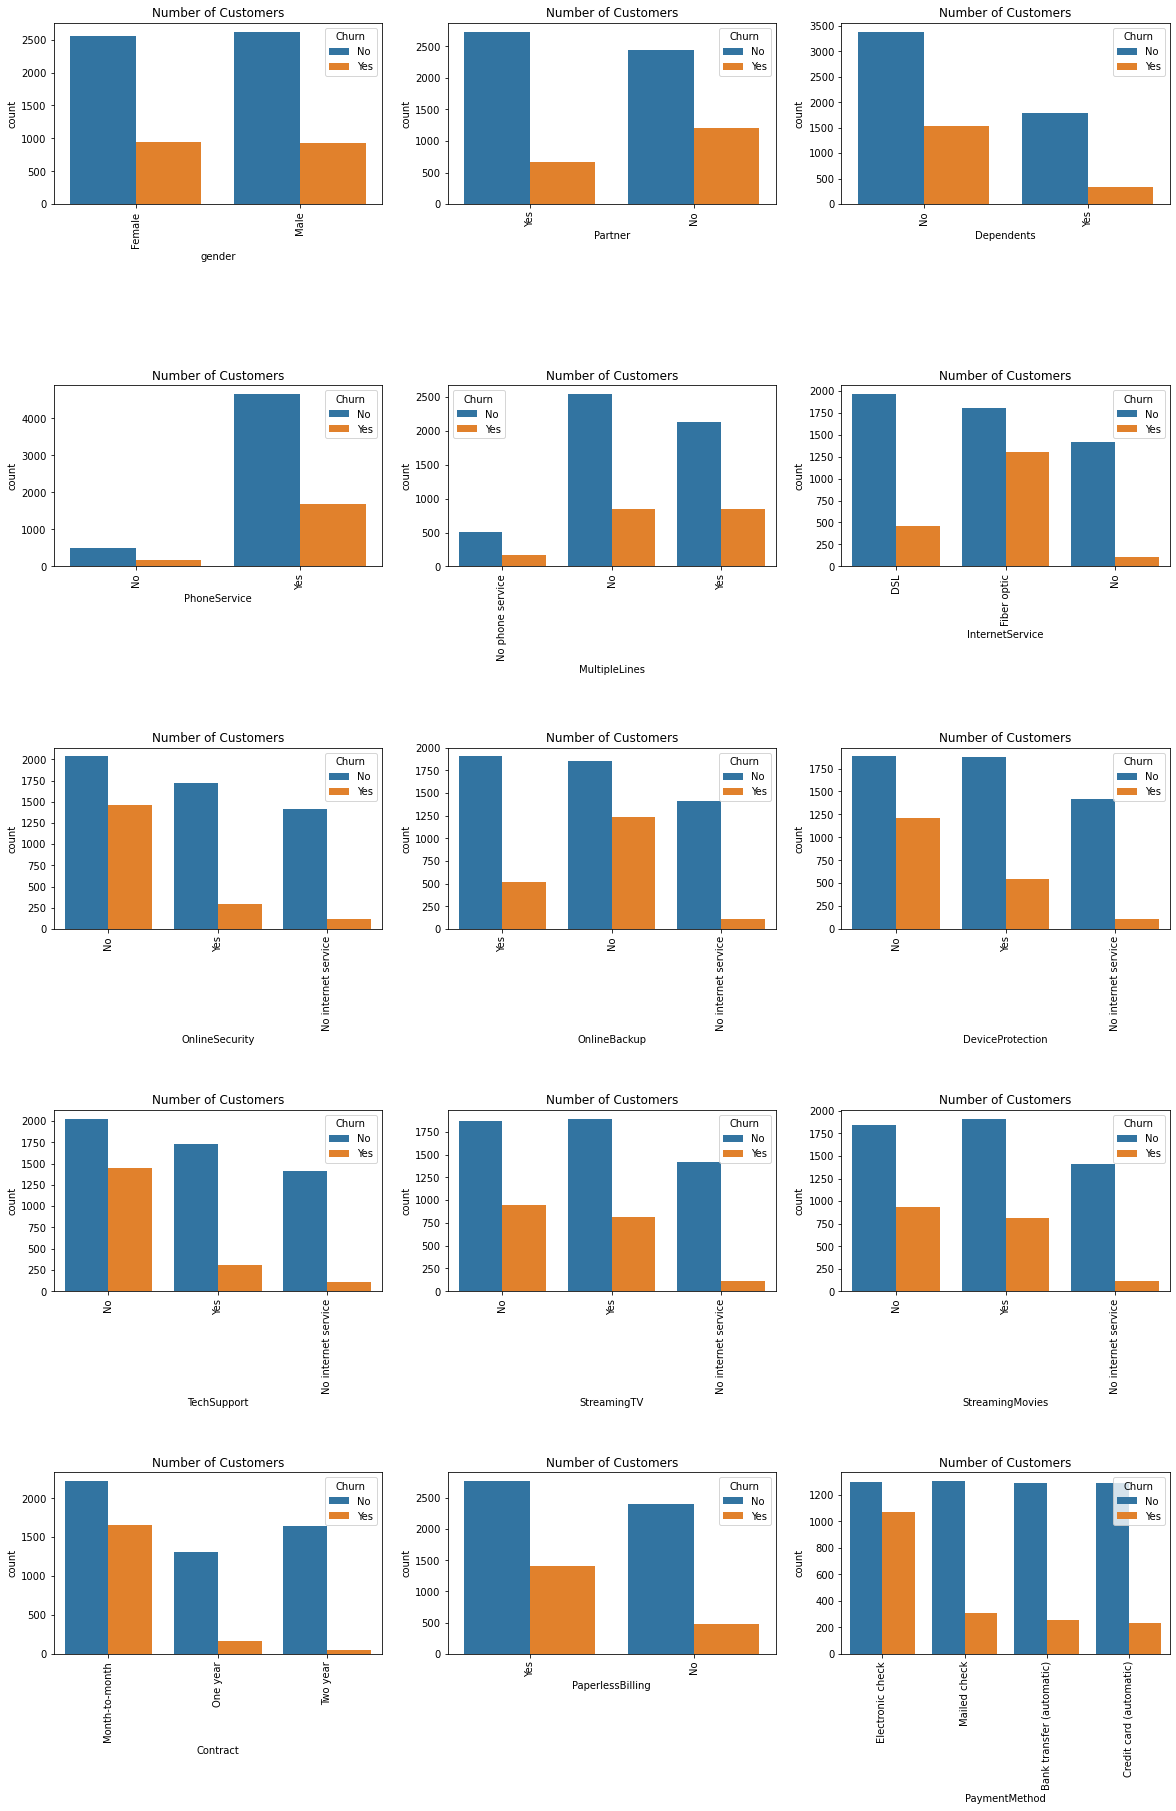

In [11]:
variables=['gender','Partner','Dependents','PhoneService', 'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
fig=plt.subplots(figsize=(20,30))
for i, j in enumerate(variables):
    plt.subplot(5, 3, i+1)
    plt.subplots_adjust(hspace = 1)
    sns.countplot(x=j,data = df, hue='Churn')
    plt.xticks(rotation=90)
    plt.title("Number of Customers")

From the above analysis it is seen that
1. The the male female are approximately equal in numbers with regard to churn as yes or no.
2. The number of customers with partners continuing with the company are more as compared to who left the company.
3. The number of customers who stayed with the company having no dependents are more in numbers than the customers who stayed but having dependents, but the number of customers having dependents are more who left the company.
4. The number of customers having phone service are more in numbers than the customer with no phone service, as well as the customer who stayed and left the company fall more in the category of customers having phone service so no conclusion can be drawn on the basis of this variable withour further analysis.
5. There is approximately equal number of customer with multiple lines and without multiples lines who stayed and left the company.
6. The number of customers who stayed with the company are more with DSL than followed by Fiber Optic and then with no facility,but the customers who left the company are more with Fiber Optic followed by DSl and then with no facility.
7. The number of customers who left and stayed with company are more in numbers with 'no' Tech support followed by 'yes' tech support and then with no internet services.
8. The number of customer in varibles 'Steaming TV' and 'Streaming Movies' have shown similar kind of responses with regard of staying and leaving the organisation.
9. The number of customers who stayed with company as well as left the company are having month to month contract and there are vey less number of customers who left are with one year and two year contracts. Hence it can be concluded from this variable that the customer who are in one year and two year contract have stayed more with the company.
10. The number of customers who stayed and left, both, are more in numbers having paperless billing.
11. The number of customers who stayed with the company are approximately equal in numbers in all four categories but the customers who left are mosly lies with the category of Electronic Check.

#### Ploting distplots for  Numerical data.

In [12]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


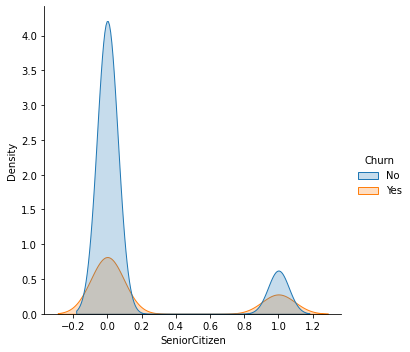

In [13]:
sns.displot(df, x='SeniorCitizen', hue="Churn", kind="kde", fill=True)

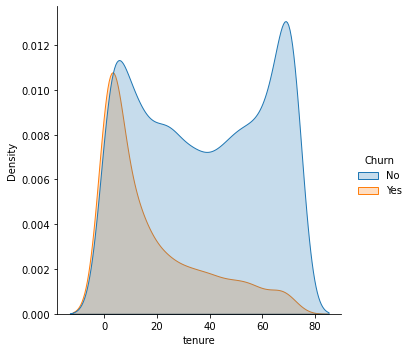

In [14]:
sns.displot(df, x='tenure', hue="Churn", kind="kde", fill=True)

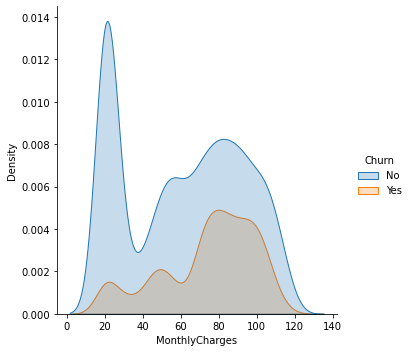

In [15]:
sns.displot(df, x='MonthlyCharges', hue="Churn", kind="kde", fill=True)

In [16]:
#Finding out the maximum and minimum monthly charges.
print('Maximum Monthly Charges:',df.MonthlyCharges.max())
print('Minimum Monthly Cahrges:',df.MonthlyCharges.min())

Maximum Monthly Charges: 118.75
Minimum Monthly Cahrges: 18.25


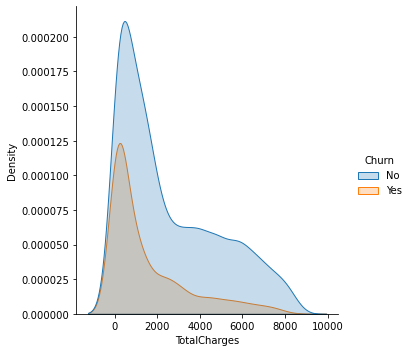

In [17]:
sns.displot(df, x='TotalCharges', hue="Churn", kind="kde", fill=True)

In [18]:
# Finding out the maximum and minimum total charges.
print('Maximum Total Charges:',df.TotalCharges.max())
print('Minimum Total Cahrges:',df.TotalCharges.min())

Maximum Total Charges: 8684.8
Minimum Total Cahrges: 18.8


From the above distplot analysis it is clear that:
1. The number of customers who stayed and left the company are more in the category of 'no' Senior Citizen.
2. The number of customers who left the company are more in numbers with smaller tenure.
3. The minimum charges are Rs.18.25 and highest charges are Rs.118.75. The customers who left the company are more in the monthly charges range of Rs.60 to Rs.120
4. The number of customers who left the company are more in the range of Rs.20 to Rs.2,000 as Total Charges and the customers who stayed with the company are more in teh rane of Rs.20 to Rs.4,000.

<AxesSubplot:xlabel='Churn', ylabel='count'>

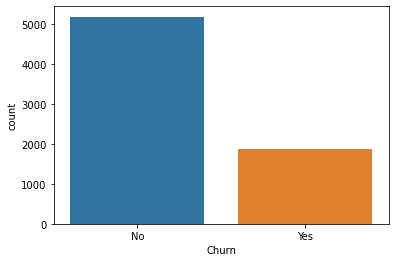

In [19]:
# Plotting countplot for target variable(Churn)
sns.countplot(x='Churn', data=df)

From the above plot it is clear that the number of cuatomers who stayed with the compay are more in numbers thanthe customers who left.

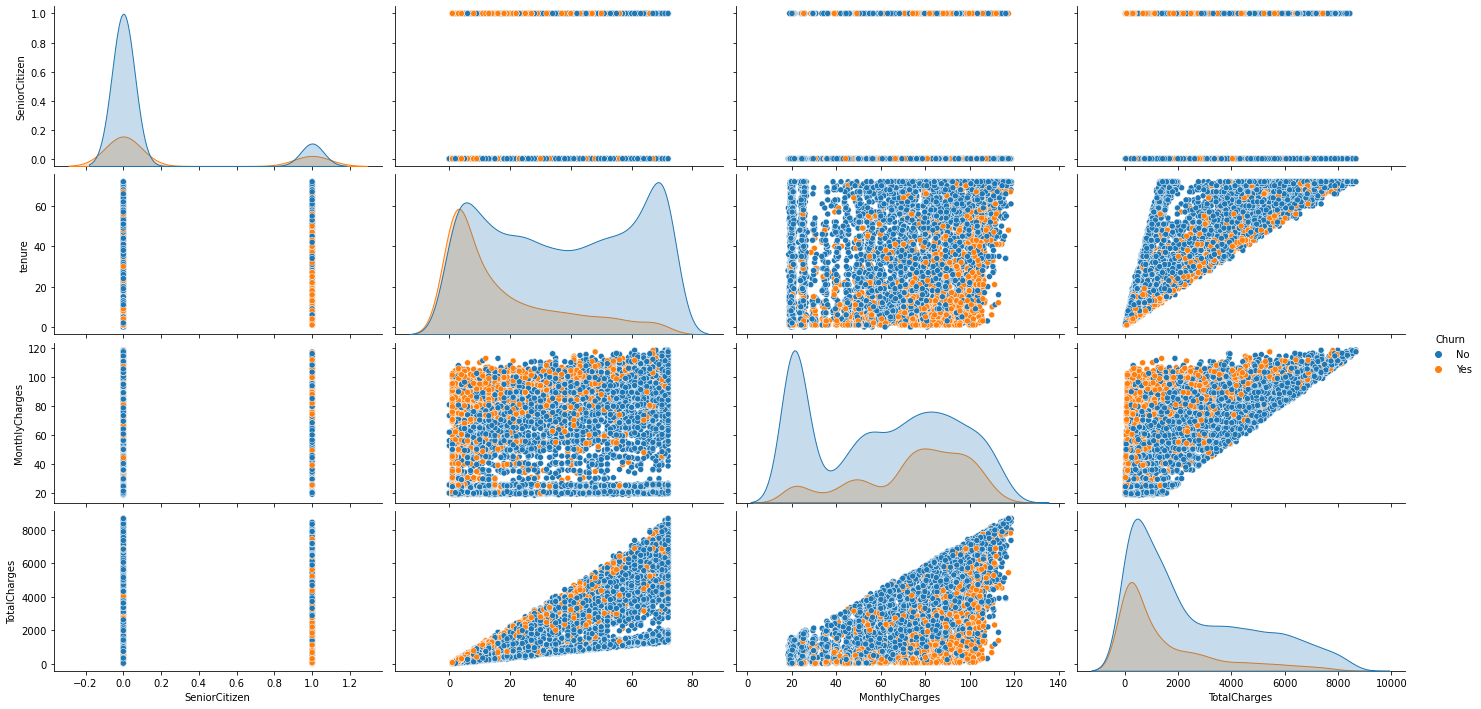

In [20]:
sns.pairplot(df, hue='Churn',height=2.5, aspect=2)

SeniorCitizen        AxesSubplot(0.125,0.536818;0.352273x0.343182)
tenure            AxesSubplot(0.547727,0.536818;0.352273x0.343182)
MonthlyCharges          AxesSubplot(0.125,0.125;0.352273x0.343182)
TotalCharges         AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

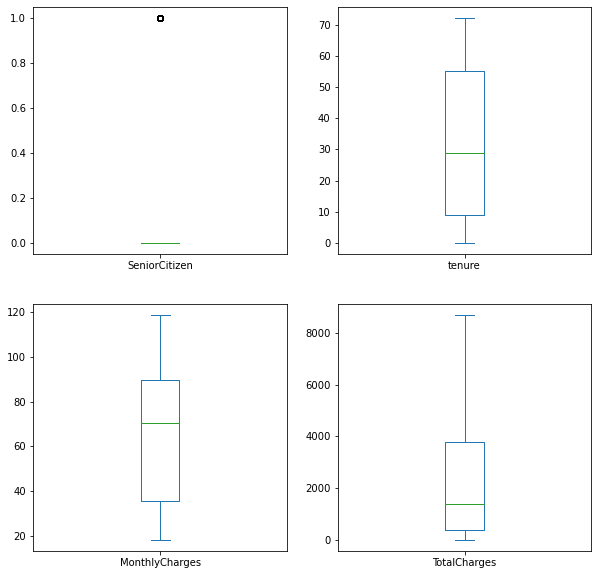

In [22]:
df.plot(kind='box',subplots=True,layout=(2,2),figsize=(10,10))

No outliers present in the numerical data variables.

In [23]:
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

#### Encoding the categorical data. 

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list1=['gender','Partner','Dependents','PhoneService', 'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [25]:
# Cahnging the Target variable seperately as the categorical values 'Yes' to be converted to '1' and 'No' to be converted to '0'
df['Churn'].replace('Yes', 1, inplace=True)
df['Churn'].replace('No', 0, inplace=True)

In [26]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0


In [27]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

The entire dataset is converted to numeric form 

#### Seperating the dataset into feature variables and target valiables

In [28]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

#### Scaling the data: Normalisation

In [29]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

#### Splitting the data set into training and testing part 

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=45)
print('xtrain shape:',xtrain.shape)
print('ytrain shape:',ytrain.shape)
print('xtest shape:',xtest.shape)
print('ytest shape:',ytest.shape)

xtrain shape: (4930, 19)
ytrain shape: (4930,)
xtest shape: (2113, 19)
ytest shape: (2113,)


### Developing Models

In [32]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [33]:
sv=SVC()
sv.fit(xtrain,ytrain)
t=sv.score(xtrain,ytrain)
print(round(t,2))

predsvc=sv.predict(xtest)
print(accuracy_score(ytest,predsvc))
print(confusion_matrix(ytest,predsvc))
print(classification_report(ytest,predsvc))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [34]:
np.any(np.isnan(df))

True

In [35]:
np.all(np.isfinite(df))

False

In [36]:
np.isnan(df.values.any())

False

In [37]:
col_mask=df.isnull().any(axis=0) 

In [38]:
row_mask=df.isnull().any(axis=1)

In [39]:
df.loc[row_mask,col_mask]

,TotalCharges
488,NaN
753,NaN
936,NaN
1082,NaN
1340,NaN
3331,NaN
3826,NaN
4380,NaN
5218,NaN
6670,NaN


#### From the initial EDA it was known that the dat has no null value but at the time of fitting the model the error comes out to be that the data set contains either NaN values or infinite values.
#### Hence treating those values in this stage.

In [250]:
df.drop(labels=[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754],axis=0,inplace=True)

In [251]:
df.shape

(7032, 20)

Total number of 11 rows have been reduced.

#### Again seperating the data set into feature variables and target variables adn then splitting the feature variables into train test split and then Normalising the data.

In [252]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [255]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X=scale.fit_transform(X)

In [256]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=.30,random_state=45)
print('Xtrain shape:',Xtrain.shape)
print('Ytrain shape:',Ytrain.shape)
print('Xtest shape:',Xtest.shape)
print('Ytest shape:',Ytest.shape)

Xtrain shape: (4922, 19)
Ytrain shape: (4922,)
Xtest shape: (2110, 19)
Ytest shape: (2110,)


In [257]:
# Again trying to fit Support Vector Classifier  model.
sv=SVC()
sv.fit(Xtrain,Ytrain)
t=sv.score(Xtrain,Ytrain)
print(round(t,2))

predsvc=sv.predict(Xtest)
print(accuracy_score(Ytest,predsvc))
print(confusion_matrix(Ytest,predsvc))
print(classification_report(Ytest,predsvc))

0.82
0.790521327014218
[[1425  127]
 [ 315  243]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1552
           1       0.66      0.44      0.52       558

    accuracy                           0.79      2110
   macro avg       0.74      0.68      0.69      2110
weighted avg       0.78      0.79      0.78      2110



In [262]:
dtc = DecisionTreeClassifier()
dtc.fit(Xtrain,Ytrain)
d=dtc.score(Xtrain,Ytrain)
print(round(d,2))

preddtc=dtc.predict(Xtest)
print(accuracy_score(Ytest,preddtc))
print(confusion_matrix(Ytest,preddtc))
print(classification_report(Ytest,preddtc))

1.0
0.7265402843601896
[[1276  276]
 [ 301  257]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1552
           1       0.48      0.46      0.47       558

    accuracy                           0.73      2110
   macro avg       0.65      0.64      0.64      2110
weighted avg       0.72      0.73      0.72      2110



In [264]:
# k=5
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain,Ytrain)
k=knn.score(Xtrain,Ytrain)
print(round(k,2))

predknn=knn.predict(Xtest)
print(accuracy_score(Ytest,predknn))
print(confusion_matrix(Ytest,predknn))
print(classification_report(Ytest,predknn))

0.83
0.7582938388625592
[[1313  239]
 [ 271  287]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1552
           1       0.55      0.51      0.53       558

    accuracy                           0.76      2110
   macro avg       0.69      0.68      0.68      2110
weighted avg       0.75      0.76      0.76      2110



In [265]:
# k=3
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain,Ytrain)
kn=knn.score(Xtrain,Ytrain)
print(round(kn,2))

predknn=knn.predict(Xtest)
print(accuracy_score(Ytest,predknn))
print(confusion_matrix(Ytest,predknn))
print(classification_report(Ytest,predknn))

0.86
0.7502369668246446
[[1305  247]
 [ 280  278]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1552
           1       0.53      0.50      0.51       558

    accuracy                           0.75      2110
   macro avg       0.68      0.67      0.67      2110
weighted avg       0.75      0.75      0.75      2110



In [266]:
lg=LogisticRegression()
lg.fit(Xtrain,Ytrain)
l=lg.score(Xtrain,Ytrain)
print(round(l,2))

pred=lg.predict(Xtest)
print("accuracy_score :",accuracy_score(pred,Ytest))
print(confusion_matrix(Ytest,pred))
print(classification_report(Ytest,pred))

0.81
accuracy_score : 0.8023696682464455
[[1402  150]
 [ 267  291]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1552
           1       0.66      0.52      0.58       558

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110



From all the fitted models the accuracy scores and f1-score of Logistic Regression are the best one. it is giving an accuracy of 80% and f1 score as 87%. 

### Using Ensemble techniques to improve the model performance

In [267]:
rfc=RandomForestClassifier()
rfc.fit(Xtrain,Ytrain)
r=rfc.score(Xtrain,Ytrain)
print(round(r,2))

predrfc=rfc.predict(Xtest)
print(accuracy_score(Ytest,predrfc))
print(confusion_matrix(Ytest,predrfc))
print(classification_report(Ytest,predrfc))

1.0
0.7933649289099526
[[1414  138]
 [ 298  260]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.65      0.47      0.54       558

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



In [268]:
abc=AdaBoostClassifier()
abc.fit(Xtrain,Ytrain)
a=abc.score(Xtrain,Ytrain)
print(round(a,2))

predabc=abc.predict(Xtest)
print(accuracy_score(Ytest,predabc))
print(confusion_matrix(Ytest,predabc))
print(classification_report(Ytest,predabc))

0.81
0.8056872037914692
[[1413  139]
 [ 271  287]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1552
           1       0.67      0.51      0.58       558

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



From the above two ensemble techniques the scores of AdaBoost Classifier are the best ones. It is giving the accuracy score of 80% and f1 score as 87%.

### Cross Validation: Using K-fold cross validation to check the overfitting of the model

Going for cross validation of 1. Logistic Regression   2. AdaBoost Classifier 

In [272]:
score=cross_val_score(lg,Xtrain,Ytrain,cv=KFold)
print('Scores:',score)
print('Mean Score;',score.mean())
print('Std of Scores:',score.std())

Scores: [0.79310345 0.81135903 0.79268293 0.80284553 0.80691057 0.79674797
 0.82520325 0.80894309 0.79268293 0.78658537]
Mean Score; 0.8017064100661292
Std of Scores: 0.011027758412771422


In [273]:
score=cross_val_score(abc,Xtrain,Ytrain,cv=KFold)
print('Scores:',score)
print('Mean Score;',score.mean())
print('Std of Scores:',score.std())

Scores: [0.77484787 0.79716024 0.79878049 0.79878049 0.79268293 0.79471545
 0.83333333 0.81504065 0.77845528 0.79268293]
Mean Score; 0.7976479658305711
Std of Scores: 0.015889808942567665


1. From the Cross validation scores of both the models it is seen that logistic Regression performing in a better way than the AdaBoost Clsssifier, but the corss validation score of AdaBoost Classifier is also satisfactory.
2. Both the models  are giving a good score of standard deviation as well

### Hyper Parameter Tuning


In [275]:
from sklearn.model_selection import GridSearchCV

In [281]:
#LR = LogisticRegression()
lgparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
lg_search = GridSearchCV(lg, param_grid=lgparam_grid, refit = True, verbose = 3, cv=5)

# fitting the model for grid search 
lg_search.fit(Xtrain , Ytrain);
# summarize
print('Mean Accuracy: %.3f' % lg_search.best_score_)
print('Config: %s' % lg_search.best_params_)

Fitting 5 folds for each of 490 candidates, totalling 2450 fits
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0

[CV 4/5] END C=0.001, max_iter=200, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l2, solver=liblinear;, score=0.769 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=l2, solver=sag;, score=0.759 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l2, solver=sag;, score=0.780 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=l2, solver=sag;, score=0.777 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=l2, solver=sag;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=200, penalty=l2, solver=sag;, score=0.768 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=200, penalty=l2, solver=saga;, score=0.759 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=200, penalty=l2, solver=saga;, score=0.780 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=200, penalty=l2, solver=saga;, score=0.777 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=200, penalty=l2, solver=saga;, sco

[CV 2/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.777 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=400, penalty=l2, solver=lbfgs;, score=0.768 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=400, penalty=l2, solver=liblinear;, score=0.814 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, penalty=l2, solver=liblinear;, score=0.769 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=400, penalty=l2, solver=liblinear;, score=0.780 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=400, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=400, penalty=l2, solver=liblinear;, score=0.769 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=400, penalty=l2, solver=sag;, score=0.759 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=400, penalt

[CV 1/5] END C=0.001, max_iter=600, penalty=l2, solver=newton-cg;, score=0.759 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=600, penalty=l2, solver=newton-cg;, score=0.777 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=l2, solver=newton-cg;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=600, penalty=l2, solver=newton-cg;, score=0.768 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.759 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.777 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=600, penalty=l2, solver=lbfgs;, score=0.768 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=600, pena

[CV 1/5] END C=0.01, max_iter=100, penalty=l1, solver=saga;, score=0.792 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l1, solver=saga;, score=0.797 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l1, solver=saga;, score=0.792 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l1, solver=saga;, score=0.802 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l1, solver=saga;, score=0.793 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.808 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.788 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.801 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.808 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=100, penalty=l2, solver=newton-cg;, score=0.792 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=100, penalty=l2, solver=l

[CV 3/5] END C=0.01, max_iter=300, penalty=l1, solver=liblinear;, score=0.791 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=l1, solver=liblinear;, score=0.813 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=l1, solver=liblinear;, score=0.790 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=300, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=300, penalty=l1, solver=saga;, score=0.792 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=300, penalty=l1, solver=saga;, score=0.797 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=300, penalty=l1, solver=saga;, score=0.792 total t

[CV 3/5] END C=0.01, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, max_iter=500, penalty=l1, solver=liblinear;, score=0.797 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=500, penalty=l1, solver=liblinear;, score=0.793 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=500, penalty=l1, solver=liblinear;, 

[CV 4/5] END C=0.01, max_iter=600, penalty=l2, solver=sag;, score=0.808 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l2, solver=sag;, score=0.792 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.808 total time=   0.0s
[CV 2/5] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.788 total time=   0.0s
[CV 3/5] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.801 total time=   0.0s
[CV 4/5] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.808 total time=   0.0s
[CV 5/5] END C=0.01, max_iter=600, penalty=l2, solver=saga;, score=0.792 total time=   0.0s
[CV 1/5] END C=0.01, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, max_iter=700, penalty=l1, solver=newton-cg;, score=n

[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.812 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.792 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.813 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.794 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.798 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.811 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=100, penalty=l2, solver=sag;, score=0.791 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=100, penalty=l2, solver=saga;, score=0.813 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=100, penalty=l2, solver=saga;, score=0.794 tot

[CV 4/5] END C=0.1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.811 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=300, penalty=l2, solver=newton-cg;, score=0.792 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.813 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.794 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.798 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.811 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=300, penalty=l2, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=300, penalty=l2, solver=liblinear;, score=0.813 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=300, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=300, penalty=l2, solver=liblinear;, score=0.800 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=300, penalty=l2, solver=libline

[CV 1/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.814 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.795 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.799 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.812 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=500, penalty=l1, solver=saga;, score=0.790 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.813 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.794 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.798 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.811 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.792 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=500, penalty=l2, solver=lbfgs;, scor

[CV 5/5] END C=0.1, max_iter=700, penalty=l1, solver=liblinear;, score=0.790 total time=   0.0s
[CV 1/5] END C=0.1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, max_iter=700, penalty=l1, solver=saga;, score=0.814 total time=   0.0s
[CV 2/5] END C=0.1, max_iter=700, penalty=l1, solver=saga;, score=0.795 total time=   0.0s
[CV 3/5] END C=0.1, max_iter=700, penalty=l1, solver=saga;, score=0.799 total time=   0.0s
[CV 4/5] END C=0.1, max_iter=700, penalty=l1, solver=saga;, score=0.812 total time=   0.0s
[CV 5/5] END C=0.1, max_iter=700, penalty=l1, solver=saga;, score=0.790 total time=   0.0s
[CV 1/5] 

[CV 2/5] END C=1, max_iter=200, penalty=l1, solver=liblinear;, score=0.788 total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=l1, solver=liblinear;, score=0.799 total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l1, solver=liblinear;, score=0.815 total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=l1, solver=liblinear;, score=0.791 total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=200, penalty=l1, solver=saga;, score=0.810 total time=   0.0s
[CV 2/5] END C=1, max_iter=200, penalty=l1, solver=saga;, score=0.788 total time=   0.0s
[CV 3/5] END C=1

[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.810 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.788 total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.799 total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.815 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.791 total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END

[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.788 total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.799 total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.815 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.791 total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.810 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.788 total time=   0.0s
[CV 3/5] END C=1

[CV 2/5] END C=10, max_iter=100, penalty=l1, solver=liblinear;, score=0.788 total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l1, solver=liblinear;, score=0.799 total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l1, solver=liblinear;, score=0.817 total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l1, solver=liblinear;, score=0.791 total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=100, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=100, penalty=l1, solver=saga;, score=0.810 total time=   0.0s
[CV 2/5] END C=10, max_iter=100, penalty=l1, solver=saga;, score=0.788 total time=   0.0s
[CV 3

[CV 1/5] END C=10, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=l1, solver=liblinear;, score=0.810 total time=   0.0s
[CV 2/5] END C=10, max_iter=300, penalty=l1, solver=liblinear;, score=0.788 total time=   0.0s
[CV 3/5] END C=10, max_iter=300, penalty=l1, solver=liblinear;, score=0.799 total time=   0.0s
[CV 4/5] END C=10, max_iter=300, penalty=l1, solver=liblinear;, score=0.817 total time=   0.0s
[CV 5/5] END C=10, max_iter=300, penalty=l1, solver=liblinear;, score=0.791 total time=   0.0s
[CV 1/5] END C=10, max_iter=300, penalty=l1, solver=sag;, score=nan total time= 

[CV 4/5] END C=10, max_iter=400, penalty=l2, solver=saga;, score=0.817 total time=   0.0s
[CV 5/5] END C=10, max_iter=400, penalty=l2, solver=saga;, score=0.791 total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=10, max_iter=500, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=10, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=10, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=10, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=10, max_iter=500, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s

[CV 1/5] END C=10, max_iter=600, penalty=l2, solver=sag;, score=0.810 total time=   0.0s
[CV 2/5] END C=10, max_iter=600, penalty=l2, solver=sag;, score=0.788 total time=   0.0s
[CV 3/5] END C=10, max_iter=600, penalty=l2, solver=sag;, score=0.799 total time=   0.0s
[CV 4/5] END C=10, max_iter=600, penalty=l2, solver=sag;, score=0.817 total time=   0.0s
[CV 5/5] END C=10, max_iter=600, penalty=l2, solver=sag;, score=0.791 total time=   0.0s
[CV 1/5] END C=10, max_iter=600, penalty=l2, solver=saga;, score=0.810 total time=   0.0s
[CV 2/5] END C=10, max_iter=600, penalty=l2, solver=saga;, score=0.788 total time=   0.0s
[CV 3/5] END C=10, max_iter=600, penalty=l2, solver=saga;, score=0.799 total time=   0.0s
[CV 4/5] END C=10, max_iter=600, penalty=l2, solver=saga;, score=0.817 total time=   0.0s
[CV 5/5] END C=10, max_iter=600, penalty=l2, solver=saga;, score=0.791 total time=   0.0s
[CV 1/5] END C=10, max_iter=700, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END

[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.788 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.801 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.817 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=lbfgs;, score=0.791 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=liblinear;, score=0.810 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=liblinear;, score=0.788 total time=   0.0s
[CV 3/5] END C=100, max_iter=100, penalty=l2, solver=liblinear;, score=0.801 total time=   0.0s
[CV 4/5] END C=100, max_iter=100, penalty=l2, solver=liblinear;, score=0.817 total time=   0.0s
[CV 5/5] END C=100, max_iter=100, penalty=l2, solver=liblinear;, score=0.791 total time=   0.0s
[CV 1/5] END C=100, max_iter=100, penalty=l2, solver=sag;, score=0.810 total time=   0.0s
[CV 2/5] END C=100, max_iter=100, penalty=l2, solver=sag;, sco

[CV 3/5] END C=100, max_iter=300, penalty=l1, solver=saga;, score=0.801 total time=   0.0s
[CV 4/5] END C=100, max_iter=300, penalty=l1, solver=saga;, score=0.817 total time=   0.0s
[CV 5/5] END C=100, max_iter=300, penalty=l1, solver=saga;, score=0.791 total time=   0.0s
[CV 1/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.810 total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.788 total time=   0.0s
[CV 3/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.801 total time=   0.0s
[CV 4/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.817 total time=   0.0s
[CV 5/5] END C=100, max_iter=300, penalty=l2, solver=newton-cg;, score=0.791 total time=   0.0s
[CV 1/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, score=0.810 total time=   0.0s
[CV 2/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, score=0.788 total time=   0.0s
[CV 3/5] END C=100, max_iter=300, penalty=l2, solver=lbfgs;, sc

[CV 3/5] END C=100, max_iter=500, penalty=l1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=l1, solver=liblinear;, score=0.817 total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=l1, solver=liblinear;, score=0.791 total time=   0.0s
[CV 1/5] END C=100, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.810 total time=   0.0s
[CV 2/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.788 total time=   0.0s
[CV 3/5] END C=100, max_iter=500, penalty=l1, solver=saga;, score=0.801 total time=   0.0s

[CV 1/5] END C=100, max_iter=700, penalty=l1, solver=liblinear;, score=0.810 total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=l1, solver=liblinear;, score=0.788 total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=l1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=l1, solver=liblinear;, score=0.817 total time=   0.0s
[CV 5/5] END C=100, max_iter=700, penalty=l1, solver=liblinear;, score=0.791 total time=   0.0s
[CV 1/5] END C=100, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=100, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=100, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=100, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=100, max_iter=700, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=100, max_iter=700, penalty=l1, solver=saga;, score=0.810 total ti

[CV 1/5] END C=1000, max_iter=200, penalty=l1, solver=liblinear;, score=0.810 total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=l1, solver=liblinear;, score=0.788 total time=   0.0s
[CV 3/5] END C=1000, max_iter=200, penalty=l1, solver=liblinear;, score=0.800 total time=   0.0s
[CV 4/5] END C=1000, max_iter=200, penalty=l1, solver=liblinear;, score=0.817 total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=l1, solver=liblinear;, score=0.791 total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1000, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1000, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1000, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1000, max_iter=200, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1000, max_iter=200, penalty=l1, solver=saga;, score=0.8

[CV 3/5] END C=1000, max_iter=500, penalty=l2, solver=liblinear;, score=0.801 total time=   0.0s
[CV 4/5] END C=1000, max_iter=500, penalty=l2, solver=liblinear;, score=0.817 total time=   0.0s
[CV 5/5] END C=1000, max_iter=500, penalty=l2, solver=liblinear;, score=0.791 total time=   0.0s
[CV 1/5] END C=1000, max_iter=500, penalty=l2, solver=sag;, score=0.810 total time=   0.0s
[CV 2/5] END C=1000, max_iter=500, penalty=l2, solver=sag;, score=0.788 total time=   0.0s
[CV 3/5] END C=1000, max_iter=500, penalty=l2, solver=sag;, score=0.801 total time=   0.0s
[CV 4/5] END C=1000, max_iter=500, penalty=l2, solver=sag;, score=0.817 total time=   0.0s
[CV 5/5] END C=1000, max_iter=500, penalty=l2, solver=sag;, score=0.791 total time=   0.0s
[CV 1/5] END C=1000, max_iter=500, penalty=l2, solver=saga;, score=0.810 total time=   0.0s
[CV 2/5] END C=1000, max_iter=500, penalty=l2, solver=saga;, score=0.788 total time=   0.0s
[CV 3/5] END C=1000, max_iter=500, penalty=l2, solver=saga;, score=0.8

[CV 1/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.810 total time=   0.0s
[CV 2/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.788 total time=   0.0s
[CV 3/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.801 total time=   0.0s
[CV 4/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.817 total time=   0.0s
[CV 5/5] END C=1000, max_iter=700, penalty=l2, solver=newton-cg;, score=0.791 total time=   0.0s
[CV 1/5] END C=1000, max_iter=700, penalty=l2, solver=lbfgs;, score=0.810 total time=   0.0s
[CV 2/5] END C=1000, max_iter=700, penalty=l2, solver=lbfgs;, score=0.788 total time=   0.0s
[CV 3/5] END C=1000, max_iter=700, penalty=l2, solver=lbfgs;, score=0.801 total time=   0.0s
[CV 4/5] END C=1000, max_iter=700, penalty=l2, solver=lbfgs;, score=0.817 total time=   0.0s
[CV 5/5] END C=1000, max_iter=700, penalty=l2, solver=lbfgs;, score=0.791 total time=   0.0s
[CV 1/5] END C=1000, max_iter=700, penalty=l2, sol

In [284]:
print('Mean Accuracy:', lg_search.best_score_)
print('Config:', lg_search.best_params_)

Mean Accuracy: 0.8045503693615617
Config: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


The mean accuracy score with the hyper parameters comes out to be 80%, hence the model is working consistantly on 80% accuracy.

### Applying AUC-ROC to know how good the model is working

In [287]:
Y_pred_prob=lg.predict_proba(Xtest)[:,1]
print('The predicted probailities are:',Y_pred_prob)
fpr,tpr,thresholds=roc_curve(Ytest,Y_pred_prob)
print('The fpr values:',fpr)
print('The tpr values:',tpr)
print('The threshold values are:',thresholds)

The predicted probailities are: [0.10894449 0.37895633 0.09876269 ... 0.55984803 0.08198876 0.41530147]
The fpr values: [0.00000000e+00 0.00000000e+00 0.00000000e+00 6.44329897e-04
 6.44329897e-04 1.28865979e-03 1.28865979e-03 1.93298969e-03
 1.93298969e-03 2.57731959e-03 2.57731959e-03 3.22164948e-03
 3.22164948e-03 3.86597938e-03 3.86597938e-03 4.51030928e-03
 4.51030928e-03 5.15463918e-03 5.15463918e-03 5.79896907e-03
 5.79896907e-03 6.44329897e-03 6.44329897e-03 7.08762887e-03
 7.08762887e-03 7.73195876e-03 7.73195876e-03 8.37628866e-03
 8.37628866e-03 1.03092784e-02 1.03092784e-02 1.09536082e-02
 1.09536082e-02 1.35309278e-02 1.35309278e-02 1.61082474e-02
 1.61082474e-02 1.73969072e-02 1.73969072e-02 1.80412371e-02
 1.80412371e-02 1.86855670e-02 1.86855670e-02 1.93298969e-02
 1.93298969e-02 1.99742268e-02 1.99742268e-02 2.06185567e-02
 2.06185567e-02 2.19072165e-02 2.19072165e-02 2.31958763e-02
 2.31958763e-02 2.38402062e-02 2.38402062e-02 2.51288660e-02
 2.51288660e-02 2.57731959

 1.00000000e+00]
The tpr values: [0.         0.00179211 0.02150538 0.02150538 0.02688172 0.02688172
 0.03225806 0.03225806 0.0483871  0.0483871  0.06272401 0.06272401
 0.07168459 0.07168459 0.08422939 0.08422939 0.09498208 0.09498208
 0.11648746 0.11648746 0.11827957 0.11827957 0.1218638  0.1218638
 0.12903226 0.12903226 0.1344086  0.1344086  0.13620072 0.13620072
 0.15949821 0.15949821 0.16487455 0.16487455 0.1702509  0.1702509
 0.17204301 0.17204301 0.1827957  0.1827957  0.18637993 0.18637993
 0.18817204 0.18817204 0.18996416 0.18996416 0.19892473 0.19892473
 0.20609319 0.20609319 0.20967742 0.20967742 0.21505376 0.21505376
 0.21684588 0.21684588 0.22222222 0.22222222 0.22580645 0.22580645
 0.2311828  0.2311828  0.23297491 0.23297491 0.23476703 0.23476703
 0.23835125 0.23835125 0.24014337 0.24014337 0.24193548 0.24193548
 0.25089606 0.25089606 0.25448029 0.25448029 0.2562724  0.2562724
 0.25985663 0.25985663 0.26344086 0.26344086 0.26523297 0.26523297
 0.27060932 0.27060932 0.2724014

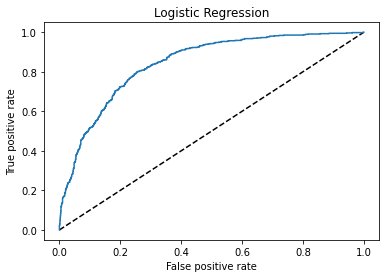

In [288]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [290]:
auc_score=roc_auc_score(Ytest,abc.predict(Xtest))
print(auc_score)

0.7123875309463105


### Saving The Model

In [291]:
import joblib

joblib.dump(lg,'lg_Customer_Churn_prediction_model.obj')

lgloadmodel=joblib.load('lg_Customer_Churn_prediction_model.obj')
pred=lgloadmodel.predict(Xtest)
print(pred)

[0 0 0 ... 1 0 0]
